<a href="https://colab.research.google.com/github/vedantnib/Machine-Learning/blob/master/9%5DImage_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's use clustering for another problem. Image quantization is a lossy compression method that replaces a range of similar colors in an image with single color. Reduces the size of the file. This example requires the mahotas library.

In [ ]:
pip install mahotas

     |████████████████████████████████| 5.7MB 4.1MB/s 


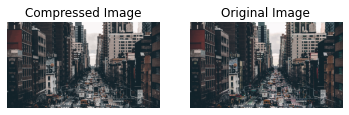

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

#First we read and flatten the image
original_img=np.array(mh.imread('/content/city_street_transport_133881_1366x768.jpg'),dtype=np.float64)/255
original_dimensions=tuple(original_img.shape)
width,height,depth=tuple(original_img.shape)
image_flattened=np.reshape(original_img,(width*height,depth))
#Now we use KMeans to create a 64 clusters from a sample of 1000 randomly selected colors.
#Each cluster will we a color in the compressed pallete

image_array_sample=shuffle(image_flattened,random_state=0)[:1000]
estimator=KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)
cluster_assignments=estimator.predict(image_flattened)
compressed_pallete=estimator.cluster_centers_
#print(compressed_pallete)
compressed_img=np.zeros((width,height,compressed_pallete.shape[1]))
label_idx=0
for i in range(width):
  for j in range(height):
    compressed_img[i][j]=compressed_pallete[cluster_assignments[label_idx]]
    label_idx+=1
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()